# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [1]:
#!pip3 install --upgrade pip
#!python --version
#%pip install pandas, numpy

In [2]:
#%pip install refinitiv-dataplatform
#%pip install matplotlib
#%pip install seaborn

In [105]:
import refinitiv.dataplatform as rdp
import pandas
%run ../credentials.ipynb

In [106]:
session = rdp.open_platform_session(
    APP_KEY,
    rdp.GrantPassword(
        username = RDP_LOGIN,
        password = RDP_PASSWORD
    )
)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [4]:
#plt.style.available

In [55]:
%matplotlib inline
plt.style.use('seaborn-v0_8-dark-palette')
warnings.filterwarnings('ignore')

### Numpy

In [6]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


In [7]:
arr

array([[1, 2, 3],
       [4, 2, 5]])

## Python Pandas

In [8]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df

,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [9]:
#utilización de índice:
print(df.loc[2])

sesion        390
asistencia     27
Name: 2, dtype: int64


In [10]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])
df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [11]:
data = rdp.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])

In [12]:
data

,instrument,TR.PriceClose,TR.Volume,TR.PriceLow,YTD Total Return
0,SPOT.K,343.69,1650718,343.305,84.279708369808
1,IBM,197.21,2572549,194.115,23.2188258683548
2,GOOG.O,168.96,12622523,168.66,20.0250586610576
3,MSFT.O,424.8,16387581,421.64,13.5761926434165


In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [68]:
dax = rdp.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])

In [69]:
dax

,instrument,TR.CommonName,TR.PriceClose,TR.Volume,YTD Total Return
0,BASFn.DE,BASF SE,44.16,2048983,-4.9431316155422
1,IFXGn.DE,Infineon Technologies AG,32.11,3166508,-15.4279085668004
2,SIEGn.DE,Siemens AG,164.86,725837,-0.852325867802117
3,EONGn.DE,E On Se,12.365,3501652,6.23097113643418
4,DBKGn.DE,Deutsche Bank AG,14.008,2653778,15.8084471732565
5,SATG_p.DE,Sartorius AG,237.9,58428,-29.17493688519
6,SAPG.DE,SAP SE,196.5,818786,42.198521097761
7,BAYGn.DE,Bayer AG,28.11,1791358,-15.6029999201869
8,RWEG.DE,RWE AG,31.49,1528761,-21.0440552172426
9,1COV.DE,Covestro AG,53.86,382075,2.20197418007049


In [15]:
dax['TR.PriceClose'] = dax['TR.PriceClose'].astype(float)
dax['TR.Volume'] = dax['TR.Volume'].astype(int)
dax['YTD Total Return'] = dax['YTD Total Return'].astype(float)

In [16]:
dax2 = dax.set_index('instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

In [17]:
dax2.dtypes

YTD_Total_Return    float64
dtype: object

In [18]:
dax2.sort_values(by=['YTD_Total_Return'])

,YTD_Total_Return
instrument,
SATG_p.DE,-29.174937
RWEG.DE,-21.044055
BNRGn.DE,-20.365772
CONG.DE,-20.205504
BAYGn.DE,-15.603000
IFXGn.DE,-15.427909
BMWG.DE,-12.877939
DHLn.DE,-11.390204
P911_p.DE,-10.879999


In [23]:
#Definir parámetros del tipo de gráfico
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

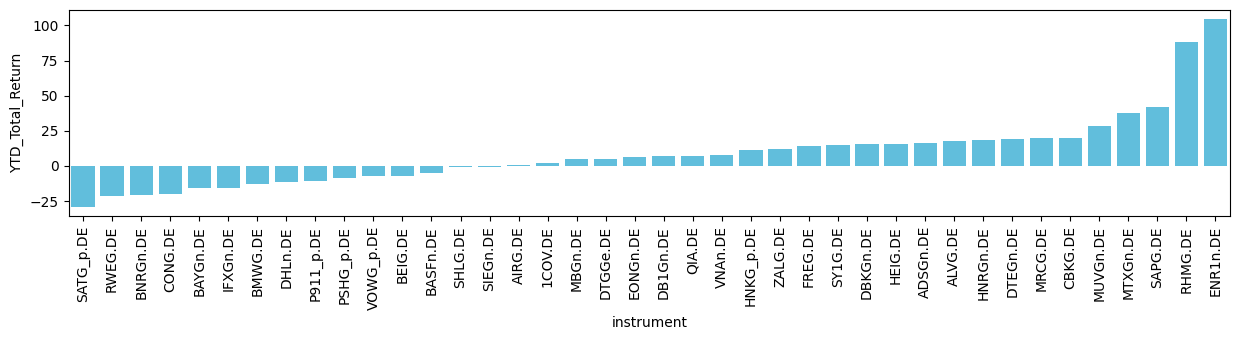

In [24]:

bar_plot = sns.barplot(x=dax2.index, y=dax2['YTD_Total_Return'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [23]:
type(dax2)

pandas.core.frame.DataFrame

In [70]:
import eikon as ek
fields = [ek.TR_Field('tr.FundHoldingRIC')]
fields

[{'tr.FundHoldingRIC': {}}]

#### Titulo


### Generen grafico para volumen de menor a mayor DJI

In [ ]:
eikon, refinitiv.data, refinitiv.dataplatform

In [56]:
XLE= rdp.get_data('XLE', ['TR.ETPConstituentRIC',
        'TR.ETPConstituentName',
        'TR.ETPConstituentWeightPercent'])

In [57]:
XLE

,instrument,TR.ETPConstituentRIC,TR.ETPConstituentName,TR.ETPConstituentWeightPercent
0,XLE,HES.N,HESS ORD,2.836556664212
1,XLE,COP.N,CONOCOPHILLIPS ORD,4.455312640551
2,XLE,TRGP.N,TARGA RESOURCS,2.36872213824
3,XLE,MPC.N,MARATHON PETROLEUM ORD,4.476338399689
4,XLE,XOM.N,EXXON ORD,23.814397218019
5,XLE,MRO.N,MARATHON OIL ORD,1.18224478595
6,XLE,PSX.N,PHILLIPS 66 ORD,4.235303508497
7,XLE,OXY.N,OCCIDENTAL U ORD,2.853070977466
8,XLE,APA.OQ,APA CORPORATION ORD,0.769627507942
9,XLE,FANG.OQ,DIAMONDBACK ENERGY ORD SHS,2.553895224784


In [60]:
IVV= rdp.get_data('IVV', ['TR.ETPConstituentRIC',
        'TR.ETPConstituentName',
        'TR.ETPConstituentWeightPercent'])

In [61]:
IVV

,instrument,TR.ETPConstituentRIC,TR.ETPConstituentName,TR.ETPConstituentWeightPercent
0,IVV,BLK.N,BLACKROCK ORD,0.255239
1,IVV,DECK.N,DECKERS OUTDOOR ORD,0.051677
2,IVV,BKNG.OQ,BOOKING HOLDINGS ORD,0.266597
3,IVV,TER.OQ,TERADYNE ORD,0.043645
4,IVV,SNPS.OQ,SYNOPSYS ORD,0.18034
...,...,...,...,...
499,IVV,ORLY.OQ,TRUIST FINANCIAL CORP ORD,0.120014
500,IVV,BR.N,O'REILLY AUTOMOTIVE ORD,0.140813
501,IVV,VZ.N,BROADRIDGE FINANCIAL SOLUTIONS ORD,0.052543
502,IVV,PSA.N,VERIZON COMMUNICATIONS ORD,0.364933


In [78]:
XLE['TR.ETPConstituentWeightPercent'] = XLE['TR.ETPConstituentWeightPercent'].astype(float)

In [65]:
XLE2 = XLE.set_index('TR.ETPConstituentRIC')['TR.ETPConstituentWeightPercent']
type(XLE2)
#bar_plot = sns.barplot(x=XLE2.index, y=XLE2['TR.ETPConstituentWeightPercent'], color="#4CC9F0")
#plt.xticks(rotation=90)
#plt.show()

pandas.core.series.Series

In [66]:
XLE2

TR.ETPConstituentRIC
HES.N       2.836557
COP.N       4.455313
TRGP.N      2.368722
MPC.N       4.476338
XOM.N      23.814397
MRO.N       1.182245
PSX.N       4.235304
OXY.N       2.853071
APA.OQ      0.769628
FANG.OQ     2.553895
EOG.N       4.924602
HAL.N       2.075454
EQT.N       1.488289
BKR.OQ      2.575233
DVN.N       2.099929
SLB.N       4.543354
VLO.N       3.484043
CVX.N      16.962459
OKE.N       3.812562
CTRA.N      1.350647
WMB.N       4.074684
KMI.N       3.063275
Name: TR.ETPConstituentWeightPercent, dtype: float64

In [9]:
#help(rdp.get_data)

# Descargar series de tiempo

In [59]:
#help(rd.get_timeseries)

In [62]:
import pandas as pd
import datetime
from IPython.display import clear_output

ricName='MSFT.O'
StartDate='2000.01.01'
EndDate=str(datetime.date.today())

if session != None:
    data=rdp.get_historical_price_summaries(
        universe=ricName,
        interval=rdp.Intervals.YEARLY, # Supported intervals: DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY.
        start=StartDate, end=EndDate)
    #if data is not None:
        #Show information of the dataframe to see column name , null and null-null field and the data type of the column
    #    data.info()
    #    display(data.head)
    #    display(data.tail)
    #else:
    #    print("Error while process the data")

In [67]:
ricName='AAPL.O'
StartDate='2000.01.01'
EndDate=str(datetime.date.today())

data=rdp.get_historical_price_summaries(
        universe=ricName,
        interval=rdp.Intervals.MONTHLY, # Supported intervals: DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY.
        start=StartDate, end=EndDate,
        fields = ['BID','ASK']
)

data

,ASK,BID
2000-01-31,0.926338,0.92578
2000-02-29,1.023995,1.023436
2000-03-31,1.21261,1.212052
2000-04-30,1.108258,1.1077
2000-05-31,0.750557,0.749999
...,...,...
2024-04-30,170.07,170.02
2024-05-31,192.48,192.47
2024-06-30,210.66,210.33
2024-07-31,222.02,221.99


In [10]:
rdp.get_historical_price_summaries(
    universe = 'VOD.L',
    interval = rdp.Intervals.DAILY,          # Supported intervals: DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY.
    count = 20,
    fields = ['BID','ASK','OPEN_PRC','HIGH_1','LOW_1','TRDPRC_1','NUM_MOVES','TRNOVR_UNS']
)

,TRDPRC_1,BID,ASK,TRNOVR_UNS,NUM_MOVES,HIGH_1,OPEN_PRC,LOW_1
2024-07-25,72.04,72.14,72.16,10866250952.07,8913,72.34,69.5,68.58
2024-07-26,73.22,73.2,73.22,4950347261.98106,5863,73.32,72.08,71.9
2024-07-29,73.3398,73.18,73.22,3603641246.65442,5703,74.74,74.16,73.22
2024-07-30,73.36,73.14,73.16,3508061469.41007,4526,73.38,73.36,72.76
2024-07-31,72.44,72.44,72.46,3800215701.1819,5000,74.34,73.52,72.32
2024-08-01,72.12,72.12,72.16,2504677350.189,4566,73.26,72.84,71.98
2024-08-02,71.94,72.22,72.26,3824891878.47556,8259,72.46,71.64,71.4
2024-08-05,68.78,69.4,69.42,9495571776.62,14299,70.74,70.36,68.08
2024-08-06,63.06,70.44,70.46,5917547736.52,6168,70.7,69.78,69.72
2024-08-07,70.78,73.18,73.2,5831392626.51,9060,73.44,70.78,70.74


In [11]:
rdp.get_historical_price_summaries('IBM.N', rdp.Intervals.ONE_MINUTE)

,HIGH_1,LOW_1,OPEN_PRC,TRDPRC_1,NUM_MOVES,ACVOL_UNS,HIGH_YLD,LOW_YLD,OPEN_YLD,YIELD,...,BID_NUMMOV,ASK_HIGH_1,ASK_LOW_1,OPEN_ASK,ASK,ASK_NUMMOV,MID_HIGH,MID_LOW,MID_OPEN,MID_PRICE
2024-08-21 19:43:00,196.95,196.9,196.9,196.93,11,1052,None,None,None,None,...,238,196.99,196.92,196.93,196.98,238,None,None,None,None
2024-08-21 19:44:00,197.06,196.94,196.96,197.06,52,10986,None,None,None,None,...,326,197.12,196.96,196.98,197.07,326,None,None,None,None
2024-08-21 19:45:00,197.11,196.99,197.06,196.99,51,3337,None,None,None,None,...,348,197.16,197.02,197.07,197.02,348,None,None,None,None
2024-08-21 19:46:00,197.01,196.87,197.0,196.89,33,1690,None,None,None,None,...,400,197.05,196.89,197.02,196.91,400,None,None,None,None
2024-08-21 19:47:00,196.9,196.76,196.89,196.76,20,1222,None,None,None,None,...,349,196.92,196.75,196.91,196.76,349,None,None,None,None
2024-08-21 19:48:00,196.92,196.73,196.73,196.91,29,2492,None,None,None,None,...,361,196.99,196.75,196.75,196.99,361,None,None,None,None
2024-08-21 19:49:00,197.06,196.9,196.96,197.03,43,2331,None,None,None,None,...,590,197.09,196.9,196.98,197.09,590,None,None,None,None
2024-08-21 19:50:00,197.09,196.99,197.06,197.06,52,2671,None,None,None,None,...,691,197.14,196.98,197.08,197.11,691,None,None,None,None
2024-08-21 19:51:00,197.06,196.91,197.03,196.93,62,3173,None,None,None,None,...,601,197.11,196.93,197.1,196.96,601,None,None,None,None
2024-08-21 19:52:00,197.08,196.93,196.93,197.04,52,2756,None,None,None,None,...,449,197.11,196.96,196.96,197.05,449,None,None,None,None


# Estadística Básica

In [70]:
dax_corto = dax['instrument'][0:10].tolist()
dax_corto

['BASFn.DE',
 'IFXGn.DE',
 'SIEGn.DE',
 'EONGn.DE',
 'DBKGn.DE',
 'SATG_p.DE',
 'SAPG.DE',
 'BAYGn.DE',
 'RWEG.DE',
 '1COV.DE']

In [72]:
today = dt.datetime.today()
d1 = today - dt.timedelta(days=100)
print(today, d1)

2024-08-21 16:51:50.353366 2024-05-13 16:51:50.353366


In [29]:
today = dt.datetime.today()
d = today - dt.timedelta(days=100)
print(today, d)

2024-08-21 15:50:54.479017 2024-05-13 15:50:54.479017


In [124]:
df1 = rdp.get_historical_price_summaries(
    universe = 'BASFn.DE',
    interval = rdp.Intervals.DAILY,          # Supported intervals: DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY.
    start=d1, end=today,
    fields = ['BID']
)
df1['BASFn.DE'] = df1['BID'].astype(float)
df1 = df1.drop(['BID'], axis=1)

list_instrument = ['BASFn.DE', 'IFXGn.DE', 'SIEGn.DE', 'EONGn.DE', 'DBKGn.DE', 'SATG_p.DE', 'SAPG.DE', 'BAYGn.DE',
 'RWEG.DE', '1COV.DE']
df_ts = df1

for intrument in range(1,len(list_instrument)):
    print(list_instrument[intrument])
    df1 = rdp.get_historical_price_summaries(
    universe = list_instrument[intrument],
    interval = rdp.Intervals.DAILY,          # Supported intervals: DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY.
    start=d1, end=today,
    fields = ['BID']
    )
    df1[list_instrument[intrument]] = df1['BID'].astype(float)
    df1 = df1.drop(['BID'], axis=1)
    df_ts = df_ts.join(df1)


IFXGn.DE
SIEGn.DE
EONGn.DE
DBKGn.DE
SATG_p.DE
SAPG.DE
BAYGn.DE
RWEG.DE
1COV.DE


In [129]:
df_ts

,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,1COV.DE
2024-05-13,48.995,37.100,188.06,13.200,15.834,277.1,176.46,29.440,34.43,48.81
2024-05-14,49.210,37.110,185.56,13.090,16.020,288.7,175.16,29.245,34.98,48.63
2024-05-15,49.575,38.040,187.66,13.240,16.074,292.2,176.22,29.300,35.69,48.47
2024-05-16,49.025,37.165,175.22,13.350,15.852,277.5,176.70,28.545,35.41,47.80
2024-05-17,48.850,36.840,173.16,12.720,15.612,268.3,176.88,28.575,34.76,48.20
...,...,...,...,...,...,...,...,...,...,...
2024-08-15,42.155,31.685,162.68,12.000,13.816,239.0,195.52,26.200,30.84,53.72
2024-08-16,42.680,31.730,163.42,12.215,14.046,238.8,196.40,29.240,31.02,54.30
2024-08-19,43.185,31.580,164.28,12.305,14.138,240.8,196.66,29.065,31.35,54.78
2024-08-20,43.430,31.675,163.74,12.375,13.862,236.5,196.24,28.180,31.48,54.18


In [97]:
len(list_instrument)

10

In [88]:
df2 = rdp.get_historical_price_summaries(
    universe = 'IFXGn.DE',
    interval = rdp.Intervals.DAILY,          # Supported intervals: DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY.
    start=d1, end=today,
    fields = ['BID']
)
df2['IFXGn.DE'] = df2['BID'].astype(float)
df2 = df2.drop(['BID'], axis=1)
#df2

In [87]:
#df1.join(df2)

In [91]:
df3

,BASFn.DE,IFXGn.DE
2024-05-13,48.995,NaN
2024-05-14,49.210,NaN
2024-05-15,49.575,NaN
2024-05-16,49.025,NaN
2024-05-17,48.850,NaN
...,...,...
2024-08-15,NaN,31.685
2024-08-16,NaN,31.730
2024-08-19,NaN,31.580
2024-08-20,NaN,31.675


In [90]:
df3 = pd.concat([df1, df2], axis=0)

In [48]:
df_ts = df1.join(df2)

In [86]:
df_ts.dtypes

BASFn.DE    string[python]
IFXGn.DE    string[python]
dtype: object

In [128]:
correlacion = df_ts[list_instrument].corr()
print(correlacion)

           BASFn.DE  IFXGn.DE  SIEGn.DE  EONGn.DE  DBKGn.DE  SATG_p.DE  \
BASFn.DE   1.000000  0.871244  0.750624  0.443307  0.823910   0.394945   
IFXGn.DE   0.871244  1.000000  0.799679  0.182341  0.829834   0.289271   
SIEGn.DE   0.750624  0.799679  1.000000  0.363920  0.923482   0.199171   
EONGn.DE   0.443307  0.182341  0.363920  1.000000  0.356662   0.507215   
DBKGn.DE   0.823910  0.829834  0.923482  0.356662  1.000000   0.169805   
SATG_p.DE  0.394945  0.289271  0.199171  0.507215  0.169805   1.000000   
SAPG.DE   -0.677708 -0.723552 -0.395727 -0.104541 -0.435536  -0.241107   
BAYGn.DE   0.585860  0.377774  0.351156  0.549869  0.344012   0.649998   
RWEG.DE    0.809924  0.724968  0.666010  0.619336  0.691233   0.462945   
1COV.DE   -0.712396 -0.663975 -0.295581 -0.275739 -0.357120  -0.542678   

            SAPG.DE  BAYGn.DE   RWEG.DE   1COV.DE  
BASFn.DE  -0.677708  0.585860  0.809924 -0.712396  
IFXGn.DE  -0.723552  0.377774  0.724968 -0.663975  
SIEGn.DE  -0.395727  0.351156

<Axes: >

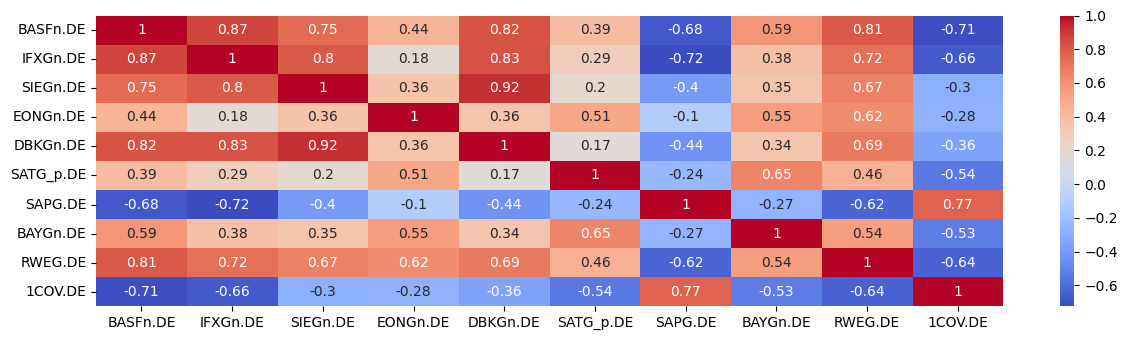

In [127]:
sns.heatmap(df_ts[list_instrument].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
Seleccionar un índice o fondo 
Calcular el rendimiento del fondo o índice 
- 1 año para atrás hoy y 
- lo van comparar a 2 años atrás a 1 año
Filtro de Clenow a los instrumuentos que son más dinámicos del periodo 2 años atrás a 1 año (2021 a 2022)
- rendimientos en el periodo de 1 año para atrás hoy (2022 a 2023)

Si se cumple o no la hipotésis que plantea Clenow

In [ ]:
https://developers.lseg.com/en/article-catalog/article/getting-start-with-refinitiv-data-platform